# About

In this programming assignment you will train a classifier to identify type of a particle. There are six particle types: electron, proton, muon, kaon, pion and ghost. Ghost is a particle with other type than the first five or a detector noise. 

Different particle types remain different responses in the detector systems or subdetectors. Thre are five systems: tracking system, ring imaging Cherenkov detector (RICH), electromagnetic and hadron calorimeters, and muon system.

![pid](pic/pid.jpg)

You task is to identify a particle type using the responses in the detector systems. 

# Attention

Data files you should download from https://github.com/hse-aml/hadron-collider-machine-learning/releases/tag/Week_2

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import numpy
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import utils

# Download data

Download data used to train classifiers.

### Read training file

In [2]:
data = pandas.read_csv('training.csv.gz')

In [3]:
data.head()

,TrackP,TrackNDoFSubdetector2,BremDLLbeElectron,MuonLooseFlag,FlagSpd,SpdE,EcalDLLbeElectron,DLLmuon,RICHpFlagElectron,EcalDLLbeMuon,...,TrackNDoF,RICHpFlagMuon,RICH_DLLbeKaon,RICH_DLLbeElectron,HcalE,MuonFlag,FlagMuon,PrsE,RICH_DLLbeMuon,RICH_DLLbeProton
0,74791.156263,15.0,0.232275,1.0,1.0,3.2,-2.505719,6.604153,1.0,1.929960,...,28.0,1.0,-7.213300,-0.280200,5586.589846,1.0,1.0,10.422315,-2.081143e-07,-24.824400
1,2738.489989,15.0,-0.357748,0.0,1.0,3.2,1.864351,0.263651,1.0,-2.061959,...,32.0,1.0,-0.324317,1.707283,-0.000007,0.0,1.0,43.334935,2.771583e+00,-0.648017
2,2161.409908,17.0,-999.000000,0.0,0.0,-999.0,-999.000000,-999.000000,0.0,-999.000000,...,27.0,0.0,-999.000000,-999.000000,-999.000000,0.0,0.0,-999.000000,-9.990000e+02,-999.000000
3,15277.730490,20.0,-0.638984,0.0,1.0,3.2,-2.533918,-8.724949,1.0,-3.253981,...,36.0,1.0,-35.202221,-14.742319,4482.803707,0.0,1.0,2.194175,-3.070819e+00,-29.291519
4,7563.700195,19.0,-0.638962,0.0,1.0,3.2,-2.087146,-7.060422,1.0,-0.995816,...,33.0,1.0,25.084287,-10.272412,5107.554680,0.0,1.0,0.000015,-5.373712e+00,23.653087


In [4]:
data.describe()

,TrackP,TrackNDoFSubdetector2,BremDLLbeElectron,MuonLooseFlag,FlagSpd,SpdE,EcalDLLbeElectron,DLLmuon,RICHpFlagElectron,EcalDLLbeMuon,...,TrackNDoF,RICHpFlagMuon,RICH_DLLbeKaon,RICH_DLLbeElectron,HcalE,MuonFlag,FlagMuon,PrsE,RICH_DLLbeMuon,RICH_DLLbeProton
count,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,...,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06
mean,1.614162e+04,1.475170e+01,-2.077315e+02,1.908400e-01,8.531908e-01,-1.443849e+02,-1.828275e+02,-1.266902e+01,9.514050e-01,-1.830022e+02,...,2.942221e+01,9.187425e-01,-5.183805e+01,-5.103860e+01,2.900030e+03,1.662333e-01,8.209933e-01,-1.338948e+02,-4.919965e+01,-5.223401e+01
std,2.790366e+04,4.038073e+00,4.054632e+02,3.929634e-01,3.539157e-01,3.545035e+02,3.854803e+02,1.049158e+02,2.150199e-01,3.853958e+02,...,6.029159e+00,2.732303e-01,2.153209e+02,2.150846e+02,7.686446e+03,3.722901e-01,3.833581e-01,3.628977e+02,2.147605e+02,2.152330e+02
min,1.115380e+03,1.000000e+00,-9.990000e+02,0.000000e+00,0.000000e+00,-9.990000e+02,-9.990000e+02,-9.990000e+02,0.000000e+00,-9.990000e+02,...,7.000000e+00,0.000000e+00,-9.990000e+02,-9.990000e+02,-9.990000e+02,0.000000e+00,0.000000e+00,-9.990000e+02,-9.990000e+02,-9.990000e+02
25%,4.137650e+03,1.300000e+01,-6.389485e-01,0.000000e+00,1.000000e+00,0.000000e+00,-3.000639e+00,-5.711142e+00,1.000000e+00,-3.367626e+00,...,2.600000e+01,1.000000e+00,-1.469941e+01,-1.310509e+01,-1.438680e-05,0.000000e+00,1.000000e+00,9.222748e-06,-4.503331e+00,-1.619484e+01
50%,8.069835e+03,1.600000e+01,-5.329026e-01,0.000000e+00,1.000000e+00,3.200000e+00,-2.321410e+00,-1.988139e+00,1.000000e+00,-1.956064e+00,...,3.000000e+01,1.000000e+00,-1.207258e-06,-2.356098e+00,5.780127e+02,0.000000e+00,1.000000e+00,2.468449e+00,-4.697510e-01,-2.928758e-06
75%,1.750157e+04,1.800000e+01,-5.933819e-02,0.000000e+00,1.000000e+00,3.200000e+00,5.918621e-01,1.669210e+00,1.000000e+00,4.339380e-01,...,3.400000e+01,1.000000e+00,8.465107e+00,1.674137e+00,3.046122e+03,0.000000e+00,1.000000e+00,8.502449e+00,1.300086e+00,8.922095e+00
max,4.750951e+06,3.000000e+01,4.791513e+00,1.000000e+00,1.000000e+00,3.200000e+00,4.341298e+00,1.471079e+01,1.000000e+00,2.153017e+00,...,5.200000e+01,1.000000e+00,1.588015e+02,1.861542e+02,8.682200e+05,1.000000e+00,1.000000e+00,2.805800e+02,1.428335e+02,1.462984e+02


### List of columns in the samples

Here, **Spd** stands for Scintillating Pad Detector, **Prs** - Preshower, **Ecal** - electromagnetic calorimeter, **Hcal** - hadronic calorimeter, **Brem** denotes traces of the particles that were deflected by detector.

- ID - id value for tracks (presents only in the test file for the submitting purposes)
- Label - string valued observable denoting particle types. Can take values "Electron", "Muon", "Kaon", "Proton", "Pion" and "Ghost". This column is absent in the test file.
- FlagSpd - flag (0 or 1), if reconstructed track passes through Spd
- FlagPrs - flag (0 or 1), if reconstructed track passes through Prs
- FlagBrem - flag (0 or 1), if reconstructed track passes through Brem
- FlagEcal - flag (0 or 1), if reconstructed track passes through Ecal
- FlagHcal - flag (0 or 1), if reconstructed track passes through Hcal
- FlagRICH1 - flag (0 or 1), if reconstructed track passes through the first RICH detector
- FlagRICH2 - flag (0 or 1), if reconstructed track passes through the second RICH detector
- FlagMuon - flag (0 or 1), if reconstructed track passes through muon stations (Muon)
- SpdE - energy deposit associated to the track in the Spd
- PrsE - energy deposit associated to the track in the Prs
- EcalE - energy deposit associated to the track in the Hcal
- HcalE - energy deposit associated to the track in the Hcal
- PrsDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Prs
- BremDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Brem
- TrackP - particle momentum
- TrackPt - particle transverse momentum
- TrackNDoFSubdetector1  - number of degrees of freedom for track fit using hits in the tracking sub-detector1
- TrackQualitySubdetector1 - chi2 quality of the track fit using hits in the tracking sub-detector1
- TrackNDoFSubdetector2 - number of degrees of freedom for track fit using hits in the tracking sub-detector2
- TrackQualitySubdetector2 - chi2 quality of the track fit using hits in the  tracking sub-detector2
- TrackNDoF - number of degrees of freedom for track fit using hits in all tracking sub-detectors
- TrackQualityPerNDoF - chi2 quality of the track fit per degree of freedom
- TrackDistanceToZ - distance between track and z-axis (beam axis)
- Calo2dFitQuality - quality of the 2d fit of the clusters in the calorimeter 
- Calo3dFitQuality - quality of the 3d fit in the calorimeter with assumption that particle was electron
- EcalDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Ecal
- EcalDLLbeMuon - delta log-likelihood for a particle candidate to be muon using information from Ecal
- EcalShowerLongitudinalParameter - longitudinal parameter of Ecal shower
- HcalDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Hcal
- HcalDLLbeMuon - delta log-likelihood for a particle candidate to be using information from Hcal
- RICHpFlagElectron - flag (0 or 1) if momentum is greater than threshold for electrons to produce Cherenkov light
- RICHpFlagProton - flag (0 or 1) if momentum is greater than threshold for protons to produce Cherenkov light
- RICHpFlagPion - flag (0 or 1) if momentum is greater than threshold for pions to produce Cherenkov light
- RICHpFlagKaon - flag (0 or 1) if momentum is greater than threshold for kaons to produce Cherenkov light
- RICHpFlagMuon - flag (0 or 1) if momentum is greater than threshold for muons to produce Cherenkov light
- RICH_DLLbeBCK  - delta log-likelihood for a particle candidate to be background using information from RICH
- RICH_DLLbeKaon - delta log-likelihood for a particle candidate to be kaon using information from RICH
- RICH_DLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from RICH
- RICH_DLLbeMuon - delta log-likelihood for a particle candidate to be muon using information from RICH
- RICH_DLLbeProton - delta log-likelihood for a particle candidate to be proton using information from RICH
- MuonFlag - muon flag (is this track muon) which is determined from muon stations
- MuonLooseFlag muon flag (is this track muon) which is determined from muon stations using looser criteria
- MuonLLbeBCK - log-likelihood for a particle candidate to be not muon using information from muon stations
- MuonLLbeMuon - log-likelihood for a particle candidate to be muon using information from muon stations
- DLLelectron - delta log-likelihood for a particle candidate to be electron using information from all subdetectors
- DLLmuon - delta log-likelihood for a particle candidate to be muon using information from all subdetectors
- DLLkaon - delta log-likelihood for a particle candidate to be kaon using information from all subdetectors
- DLLproton - delta log-likelihood for a particle candidate to be proton using information from all subdetectors
- GhostProbability - probability for a particle candidate to be ghost track. This variable is an output of classification model used in the tracking algorithm.

Delta log-likelihood in the features descriptions means the difference between log-likelihood for the mass hypothesis that a given track is left by some particle (for example, electron) and log-likelihood for the mass hypothesis that a given track is left by a pion (so, DLLpion = 0 and thus we don't have these columns). This is done since most tracks (~80%) are left by pions and in practice we actually need to discriminate other particles from pions. In other words, the null hypothesis is that particle is a pion.

### Look at the labels set

The training data contains six classes. Each class corresponds to a particle type. Your task is to predict type of a particle.

In [5]:
set(data.Label)

{'Electron', 'Ghost', 'Kaon', 'Muon', 'Pion', 'Proton'}

Convert the particle types into class numbers.

In [6]:
data['Class'] = utils.get_class_ids(data.Label.values)
set(data.Class)

{0, 1, 2, 3, 4, 5}

### Define training features

The following set of features describe particle responses in the detector systems:

![features](pic/features.jpeg)

Also there are several combined features. The full list is following.

In [7]:
features = list(set(data.columns) - {'Label', 'Class'})
features

['TrackNDoFSubdetector2',
 'DLLproton',
 'RICH_DLLbeMuon',
 'PrsE',
 'DLLelectron',
 'HcalDLLbeElectron',
 'FlagEcal',
 'TrackQualitySubdetector1',
 'BremDLLbeElectron',
 'RICH_DLLbeProton',
 'RICHpFlagElectron',
 'FlagRICH1',
 'Calo2dFitQuality',
 'MuonLLbeMuon',
 'HcalE',
 'RICHpFlagKaon',
 'DLLkaon',
 'FlagMuon',
 'FlagHcal',
 'RICHpFlagMuon',
 'Calo3dFitQuality',
 'EcalE',
 'TrackP',
 'EcalDLLbeElectron',
 'RICHpFlagPion',
 'TrackDistanceToZ',
 'RICH_DLLbeKaon',
 'MuonFlag',
 'RICH_DLLbeBCK',
 'TrackQualitySubdetector2',
 'SpdE',
 'PrsDLLbeElectron',
 'HcalDLLbeMuon',
 'DLLmuon',
 'EcalDLLbeMuon',
 'TrackPt',
 'RICHpFlagProton',
 'FlagPrs',
 'TrackNDoF',
 'FlagRICH2',
 'FlagSpd',
 'RICH_DLLbeElectron',
 'MuonLooseFlag',
 'TrackNDoFSubdetector1',
 'GhostProbability',
 'FlagBrem',
 'TrackQualityPerNDoF',
 'MuonLLbeBCK',
 'EcalShowerLongitudinalParameter']

### Divide training data into 2 parts

In [8]:
training_data, validation_data = train_test_split(data, random_state=11, train_size=0.90)

C:\Users\Theochem\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [9]:
len(training_data), len(validation_data)

(1080000, 120000)

In [12]:
validation_data[features].isnull().any()

TrackNDoFSubdetector2              False
DLLproton                          False
RICH_DLLbeMuon                     False
PrsE                               False
DLLelectron                        False
HcalDLLbeElectron                  False
FlagEcal                           False
TrackQualitySubdetector1           False
BremDLLbeElectron                  False
RICH_DLLbeProton                   False
RICHpFlagElectron                  False
FlagRICH1                          False
Calo2dFitQuality                   False
MuonLLbeMuon                       False
HcalE                              False
RICHpFlagKaon                      False
DLLkaon                            False
FlagMuon                           False
FlagHcal                           False
RICHpFlagMuon                      False
Calo3dFitQuality                   False
EcalE                              False
TrackP                             False
EcalDLLbeElectron                  False
RICHpFlagPion   

In [13]:
validation_data.describe()

,TrackP,TrackNDoFSubdetector2,BremDLLbeElectron,MuonLooseFlag,FlagSpd,SpdE,EcalDLLbeElectron,DLLmuon,RICHpFlagElectron,EcalDLLbeMuon,...,RICHpFlagMuon,RICH_DLLbeKaon,RICH_DLLbeElectron,HcalE,MuonFlag,FlagMuon,PrsE,RICH_DLLbeMuon,RICH_DLLbeProton,Class
count,1.200000e+05,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,...,120000.000000,1.200000e+05,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,1.622239e+04,14.748650,-208.264924,0.190833,0.854408,-143.316645,-181.741817,-12.550467,0.951267,-181.901005,...,0.919325,-5.125145e+01,-50.526863,2918.011349,0.166225,0.823175,-132.912416,-48.623686,-51.678961,2.502483
std,3.099143e+04,4.042175,405.846224,0.392960,0.352698,353.438825,384.573343,104.330282,0.215311,384.496469,...,0.272336,2.140926e+02,213.842372,7954.270665,0.372284,0.381522,361.914238,213.521965,213.998187,1.706005
min,1.118740e+03,1.000000,-999.000000,0.000000,0.000000,-999.000000,-999.000000,-999.000000,0.000000,-999.000000,...,0.000000,-9.990000e+02,-999.000000,-999.000000,0.000000,0.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,4.160483e+03,13.000000,-0.638958,0.000000,1.000000,0.000000,-3.000639,-5.705437,1.000000,-3.367620,...,1.000000,-1.472525e+01,-13.163790,-0.000014,0.000000,1.000000,0.000009,-4.502922,-16.324201,1.000000
50%,8.112835e+03,16.000000,-0.532913,0.000000,1.000000,3.200000,-2.341495,-2.015378,1.000000,-1.932953,...,1.000000,-8.472066e-07,-2.356799,581.291012,0.000000,1.000000,2.468449,-0.474497,-0.000003,3.000000
75%,1.755302e+04,18.000000,-0.059349,0.000000,1.000000,3.200000,0.591857,1.665147,1.000000,0.433943,...,1.000000,8.536728e+00,1.684246,3039.598556,0.000000,1.000000,8.502426,1.291701,8.945747,4.000000
max,4.750951e+06,29.000000,4.791511,1.000000,1.000000,3.200000,4.341273,14.446534,1.000000,2.152998,...,1.000000,1.439023e+02,175.202374,868220.000008,1.000000,1.000000,280.580011,129.095985,118.323090,5.000000


In [10]:
training_data[features].isnull().any()

TrackNDoFSubdetector2              False
DLLproton                          False
RICH_DLLbeMuon                     False
PrsE                               False
DLLelectron                        False
HcalDLLbeElectron                  False
FlagEcal                           False
TrackQualitySubdetector1           False
BremDLLbeElectron                  False
RICH_DLLbeProton                   False
RICHpFlagElectron                  False
FlagRICH1                          False
Calo2dFitQuality                   False
MuonLLbeMuon                       False
HcalE                              False
RICHpFlagKaon                      False
DLLkaon                            False
FlagMuon                           False
FlagHcal                           False
RICHpFlagMuon                      False
Calo3dFitQuality                   False
EcalE                              False
TrackP                             False
EcalDLLbeElectron                  False
RICHpFlagPion   

In [14]:
validation_data.describe()

,TrackP,TrackNDoFSubdetector2,BremDLLbeElectron,MuonLooseFlag,FlagSpd,SpdE,EcalDLLbeElectron,DLLmuon,RICHpFlagElectron,EcalDLLbeMuon,...,RICHpFlagMuon,RICH_DLLbeKaon,RICH_DLLbeElectron,HcalE,MuonFlag,FlagMuon,PrsE,RICH_DLLbeMuon,RICH_DLLbeProton,Class
count,1.200000e+05,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,...,120000.000000,1.200000e+05,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,1.622239e+04,14.748650,-208.264924,0.190833,0.854408,-143.316645,-181.741817,-12.550467,0.951267,-181.901005,...,0.919325,-5.125145e+01,-50.526863,2918.011349,0.166225,0.823175,-132.912416,-48.623686,-51.678961,2.502483
std,3.099143e+04,4.042175,405.846224,0.392960,0.352698,353.438825,384.573343,104.330282,0.215311,384.496469,...,0.272336,2.140926e+02,213.842372,7954.270665,0.372284,0.381522,361.914238,213.521965,213.998187,1.706005
min,1.118740e+03,1.000000,-999.000000,0.000000,0.000000,-999.000000,-999.000000,-999.000000,0.000000,-999.000000,...,0.000000,-9.990000e+02,-999.000000,-999.000000,0.000000,0.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,4.160483e+03,13.000000,-0.638958,0.000000,1.000000,0.000000,-3.000639,-5.705437,1.000000,-3.367620,...,1.000000,-1.472525e+01,-13.163790,-0.000014,0.000000,1.000000,0.000009,-4.502922,-16.324201,1.000000
50%,8.112835e+03,16.000000,-0.532913,0.000000,1.000000,3.200000,-2.341495,-2.015378,1.000000,-1.932953,...,1.000000,-8.472066e-07,-2.356799,581.291012,0.000000,1.000000,2.468449,-0.474497,-0.000003,3.000000
75%,1.755302e+04,18.000000,-0.059349,0.000000,1.000000,3.200000,0.591857,1.665147,1.000000,0.433943,...,1.000000,8.536728e+00,1.684246,3039.598556,0.000000,1.000000,8.502426,1.291701,8.945747,4.000000
max,4.750951e+06,29.000000,4.791511,1.000000,1.000000,3.200000,4.341273,14.446534,1.000000,2.152998,...,1.000000,1.439023e+02,175.202374,868220.000008,1.000000,1.000000,280.580011,129.095985,118.323090,5.000000


# Sklearn classifier

On this step your task is to train **Sklearn** classifier to provide lower **log loss** value.


TASK: your task is to tune the classifier parameters to achieve the lowest **log loss** value on the validation sample you can.

In [15]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [16]:
strain = ss.fit_transform(training_data[features].values)

In [28]:
sval = ss.fit_transform(validation_data[features].values)

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

In [20]:
%%time 
gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, subsample=0.9, random_state=13,
                                min_samples_leaf=10, max_depth=3)
#gb.fit(training_data[features].values, training_data.Class.values)
gb.fit(strain, training_data.Class.values)

Wall time: 29min 49s


### Log loss on the cross validation sample

In [29]:
# predict each track
proba_gb = gb.predict_proba(sval)

In [30]:
log_loss(validation_data.Class.values, proba_gb)

0.6792362411234732

# Keras neural network

On this step your task is to train **Keras** NN classifier to provide lower **log loss** value.


TASK: your task is to tune the classifier parameters to achieve the lowest **log loss** value on the validation sample you can. Data preprocessing may help you to improve your score.

In [39]:
from keras.layers.core import Dense, Activation, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import np_utils

In [42]:
def nn_model(input_dim):
    model = Sequential()
    model.add(Dense(200, input_dim=input_dim))
    model.add(Activation('relu'))
    model.add(Dropout(0.30))
    
    model.add(Dense(100))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    model.add(Dense(6))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=Adam())
    return model

In [43]:
nn = nn_model(len(features))
nn.fit(strain, 
       np_utils.to_categorical(training_data.Class.values), 
       validation_data=(sval, np_utils.to_categorical(validation_data.Class.values)),
       verbose=1, 
       nb_epoch=30, 
       batch_size=256)

C:\Users\Theochem\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 1080000 samples, validate on 120000 samples
Epoch 1/30
1080000/1080000 [==============================] - 12s 11us/step - loss: 0.7387 - val_loss: 0.6149
Epoch 2/30
1080000/1080000 [==============================] - 12s 11us/step - loss: 0.6442 - val_loss: 0.6040
Epoch 3/30
1080000/1080000 [==============================] - 12s 11us/step - loss: 0.6316 - val_loss: 0.6008
Epoch 4/30
1080000/1080000 [==============================] - 12s 11us/step - loss: 0.6248 - val_loss: 0.5947
Epoch 5/30
1080000/1080000 [==============================] - 12s 11us/step - loss: 0.6208 - val_loss: 0.5901
Epoch 6/30
1080000/1080000 [==============================] - 12s 11us/step - loss: 0.6178 - val_loss: 0.5897
Epoch 7/30
1080000/1080000 [==============================] - 13s 12us/step - loss: 0.6148 - val_loss: 0.5871
Epoch 8/30
1080000/1080000 [==============================] - 12s 11us/step - loss: 0.6130 - val_loss: 0.5819
Epoch 9/30
1080000/1080000 [==============================] - 12s 1

### Log loss on the cross validation sample

In [44]:
# predict each track
proba_nn = nn.predict_proba(sval)

In [45]:
log_loss(validation_data.Class.values, proba_nn)

0.5797994348655885

# Quality metrics

Plot ROC curves and signal efficiency dependece from particle mometum and transverse momentum values.

In [46]:
proba = proba_gb

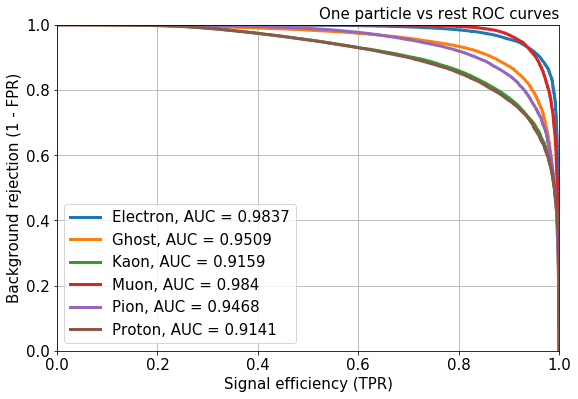

In [48]:
utils.plot_roc_curves(proba, validation_data.Class.values)

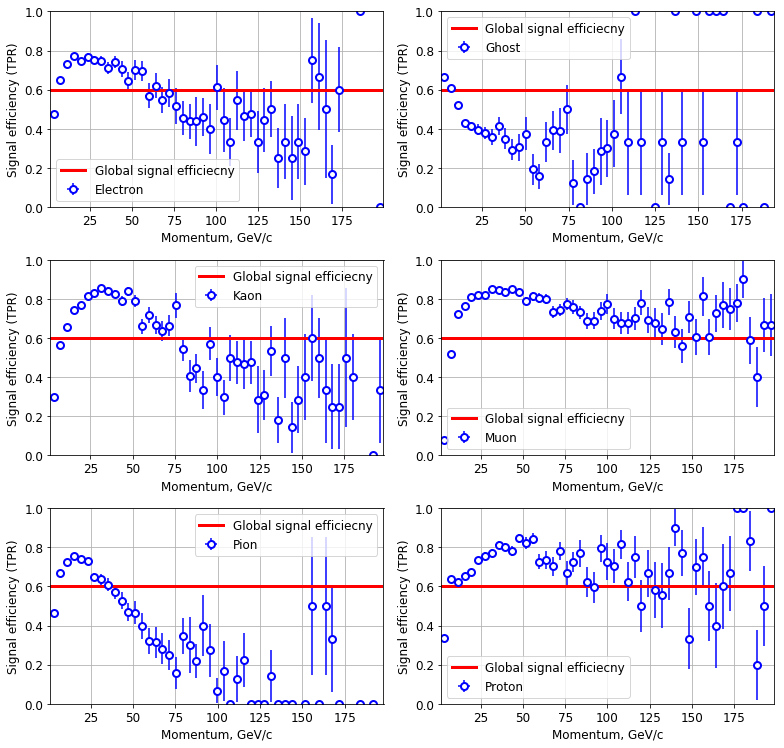

In [49]:
utils.plot_signal_efficiency_on_p(proba, validation_data.Class.values, validation_data.TrackP.values, 60, 50)
plt.show()

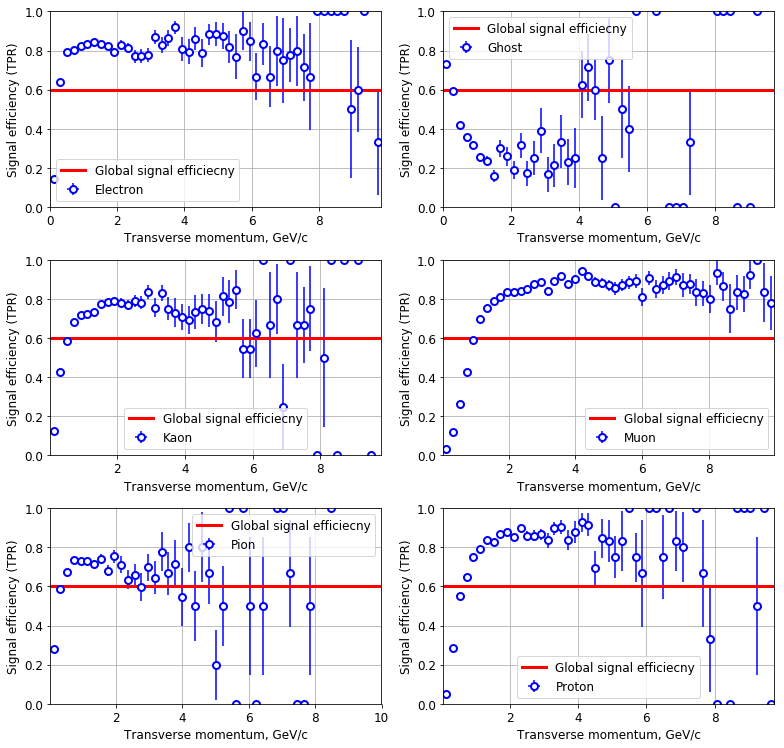

In [50]:
utils.plot_signal_efficiency_on_pt(proba, validation_data.Class.values, validation_data.TrackPt.values, 60, 50)
plt.show()

In [51]:
proba = proba_nn

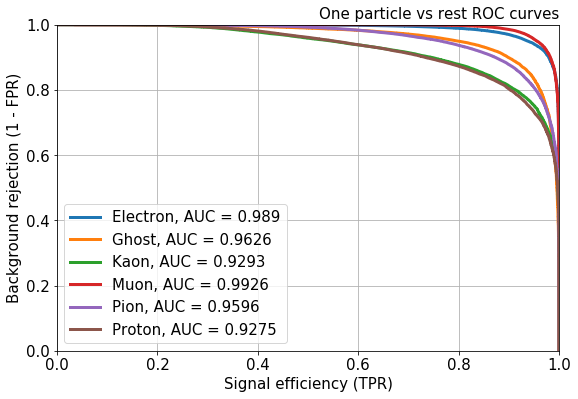

In [52]:
utils.plot_roc_curves(proba, validation_data.Class.values)

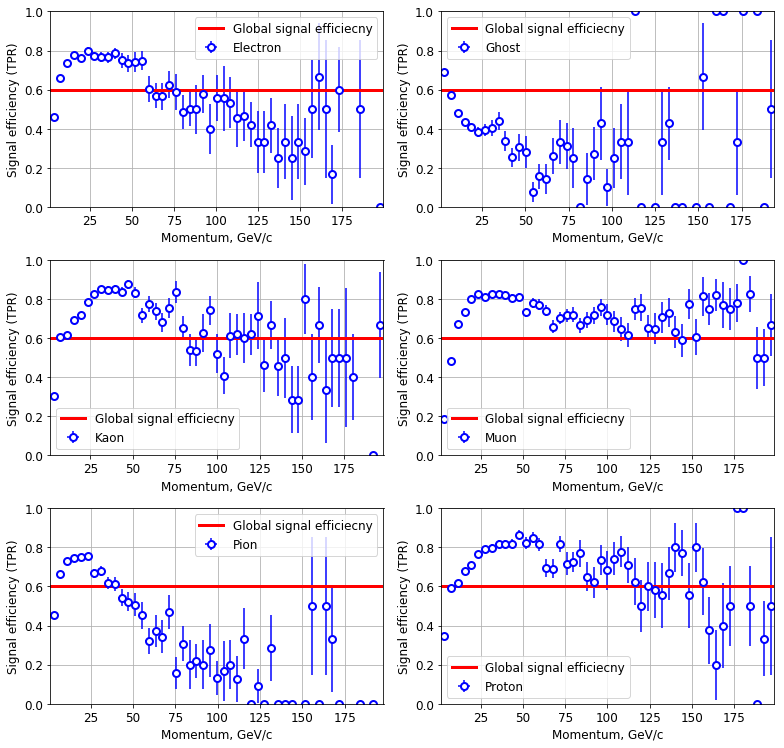

In [53]:
utils.plot_signal_efficiency_on_p(proba, validation_data.Class.values, validation_data.TrackP.values, 60, 50)
plt.show()

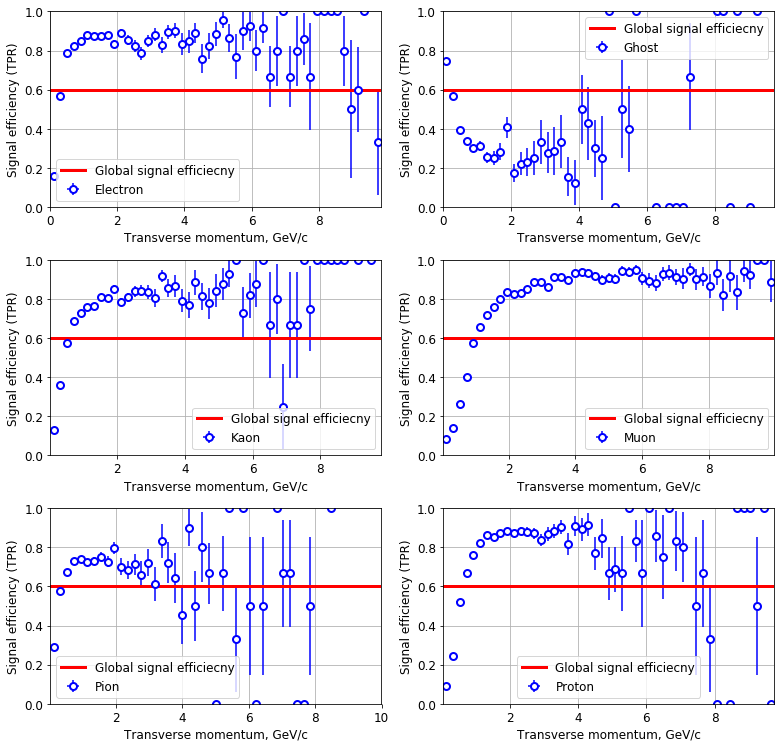

In [54]:
utils.plot_signal_efficiency_on_pt(proba, validation_data.Class.values, validation_data.TrackPt.values, 60, 50)
plt.show()

# Prepare submission

Select your best classifier and prepare submission file.

In [55]:
test = pandas.read_csv('test.csv.gz')

In [59]:
best_model = nn

In [57]:
stest = ss.transform(test[features])

In [60]:
# predict test sample
submit_proba = best_model.predict_proba(stest)
submit_ids = test.ID

In [61]:
from IPython.display import FileLink
utils.create_solution(submit_ids, submit_proba, filename='submission_file.csv.gz')

C:\Users\Theochem\Desktop\Advanced Machine Learning\Particle Physics and Machine Learning\Week 2\submission_file.csv.gz